In [1]:
# This notebook gathers metadata for the MERFISH dataset. 
# In particular we want to get (x,y,z) co-ordinates, and celltype annotations for the MERFISH and Zhuang datasets. 
import anndata as ad
import pandas as pd
import numpy as np
import toml

In [2]:
paths = toml.load('/allen/programs/celltypes/workgroups/mousecelltypes/Rohan/code/abcex/config.toml')['root']
expr_data = ad.read_h5ad(paths['data']+'expression_matrices/MERFISH-C57BL6J-638850/20230830/C57BL6J-638850-raw.h5ad', backed='r')

In [3]:
genes_anno = pd.read_csv(paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/gene.csv')
cells_anno_1 = pd.read_csv(paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/cell_metadata.csv')
cells_anno_2 = pd.read_csv(paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/views/cell_metadata_with_cluster_annotation.csv')
cells_anno_3 = pd.read_csv(paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/views/ccf_coords.csv')
# ccf_coords.csv was generated using 01_merfish_ccf_registration_tutorial.ipynb adapted from abc_atlas_access/notebooks.

In [4]:
print(genes_anno.columns)
print(cells_anno_1.columns)
print(cells_anno_2.columns)
print(cells_anno_3.columns)

Index(['gene_identifier', 'gene_symbol', 'transcript_identifier', 'name',
       'mapped_ncbi_identifier'],
      dtype='object')
Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x', 'y', 'z'],
      dtype='object')
Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x', 'y', 'z', 'neurotransmitter',
       'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color',
       'class_color', 'subclass_color', 'supertype_color', 'cluster_color'],
      dtype='object')
Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x_section', 'y_section', 'z_section',
       'neurotransmitter', 'class', 'subclass', 'supertype'

In [5]:
expr_data_ = expr_data[cells_anno_3['cell_label'],:]

In [6]:
print(expr_data.shape)
print(cells_anno_1.shape)
print(cells_anno_2.shape)
print('---')
print(expr_data_.shape)
print(cells_anno_3.shape)

(4334174, 550)
(3938808, 11)
(3938808, 21)
---
(3739961, 550)
(3739961, 38)


In [7]:
assert np.all(cells_anno_1['cell_label']==cells_anno_2['cell_label'])
assert np.all(expr_data_.obs.index==cells_anno_3['cell_label'])
display(cells_anno_3['parcellation_division'].value_counts().to_frame())

,count
parcellation_division,
Isocortex,935742
STR,401346
CB,383127
HPF,304642
MB,281852
OLF,274354
MY,147562
P,136569
TH,133805


In [8]:
# The Zhuang dataset seems to have a separate annotation for ccf coordinates.
display(cells_anno_3['parcellation_organ'].value_counts().to_frame())
display(cells_anno_3['parcellation_structure'].value_counts().to_frame())

,count
parcellation_organ,
brain,3671375
unassigned,68586


,count
parcellation_structure,
CP,234174
MOs,90859
MOp,83976
PIR,77916
MOB,77675
...,...
ISN,45
ACVII,36
IV,36


In [9]:
parc = ['parcellation_organ', 'parcellation_category',
       'parcellation_division', 'parcellation_structure',
       'parcellation_substructure']

df = cells_anno_3[parc].drop_duplicates()
display(df)

,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
0,brain,grey,HPF,DG,DG-po
1,brain,grey,P,TRN,TRN
2,brain,grey,P,P-unassigned,P-unassigned
3,brain,fiber tracts,cbf,arb,arb
7,brain,grey,P,PG,PG
...,...,...,...,...,...
743025,brain,grey,MB,IV,IV
910693,brain,grey,MB,IPN,IPN-unassigned
932528,brain,fiber tracts,cm,Xn,ts
958180,brain,grey,Isocortex,FRP,FRP6b


In [10]:
meta = cells_anno_3

In [11]:
expr_data_ = expr_data[meta['cell_label'],:]
print(expr_data_.shape)

(3739961, 550)


In [12]:
assert np.all(meta["cell_label"]==expr_data_.obs.index), "metadata and expression are not the same"

In [13]:
#display(meta['parcellation_structure'].value_counts().to_frame())

In [14]:
display(meta['z_section'].value_counts().to_frame().reset_index().sort_values('z_section').reset_index(drop=True))

,z_section,count
0,0.8,45915
1,1.0,46526
2,1.4,47009
3,1.6,69235
4,1.8,42098
5,2.0,47690
6,2.2,50612
7,2.4,71231
8,2.6,94385
9,2.8,80333


In [15]:
meta_ = meta.loc[(meta['z_section'].round(1)==6.8)].copy()
expr_data_ = expr_data[meta_['cell_label'],:]
meta_.reset_index(drop=True, inplace=True)

In [16]:
meta_.columns

Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x_section', 'y_section', 'z_section',
       'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster',
       'neurotransmitter_color', 'class_color', 'subclass_color',
       'supertype_color', 'cluster_color', 'x_reconstructed',
       'y_reconstructed', 'z_reconstructed', 'parcellation_index', 'x_ccf',
       'y_ccf', 'z_ccf', 'parcellation_organ', 'parcellation_category',
       'parcellation_division', 'parcellation_structure',
       'parcellation_substructure', 'parcellation_organ_color',
       'parcellation_category_color', 'parcellation_division_color',
       'parcellation_structure_color', 'parcellation_substructure_color'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format="retina"

In [18]:
print(meta_["parcellation_substructure"].unique().shape)
print(meta_["parcellation_division"].unique().shape)
display(meta_["parcellation_division"].value_counts().to_frame())

(201,)
(18,)


,count
parcellation_division,
Isocortex,35438
TH,19644
HY,13244
HPF,10398
STR,9318
lfbs,8821
CTXsp,5692
OLF,5162
mfbs,4476


(164,)


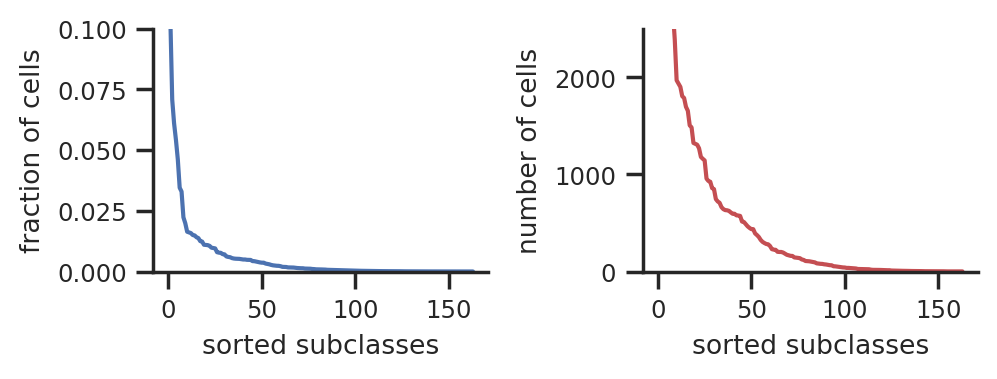

In [19]:
print(meta_["subclass"].unique().shape)
f, ax = plt.subplots(1,2,figsize=(5,2))
ax[0].plot(np.sort(meta_["subclass"].value_counts().to_frame()["count"].values)[::-1]/meta_.shape[0])
ax[0].set(xlabel="sorted subclasses", ylabel="fraction of cells", ylim=(0,0.1))

ax[1].plot(np.sort(meta_["subclass"].value_counts().to_frame()["count"].values)[::-1], c="r")
ax[1].set(xlabel="sorted subclasses", ylabel="number of cells", ylim=(0,2500))

plt.tight_layout()
plt.show()

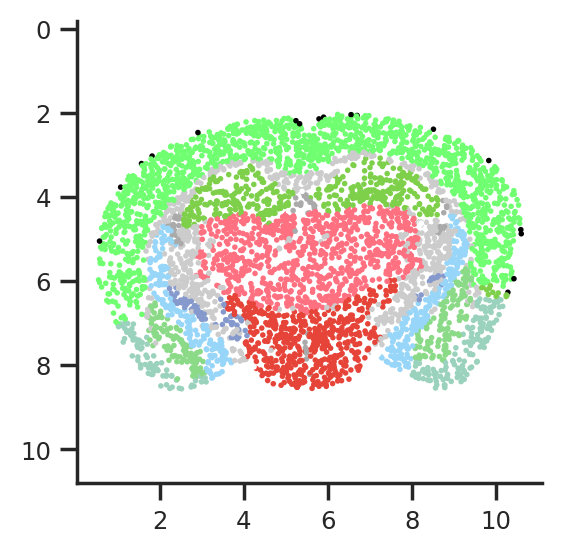

In [20]:
# subset just for quick plotting
ind = np.random.choice(a=meta_.shape[0], size=5000, replace=False)

f, ax = plt.subplots(1,1,figsize=(3,3))
ax.scatter(meta_["x_section"].iloc[ind], meta_["y_section"].iloc[ind], s=1, c=meta_["parcellation_division_color"].iloc[ind])
ax.axis("equal")
ax.invert_yaxis()

In [21]:
save_path = "/allen/programs/celltypes/workgroups/mousecelltypes/Rohan/code/abcex/data/"
adata = expr_data_.to_memory()

In [22]:
adata.obs = meta_
adata.write_h5ad(save_path+"test_one_section_raw.h5ad")